In [27]:
from numpy import angle, unwrap, sin, cos, sum, reshape, abs, sqrt
from scipy.fft import fft

def ord_CebullaRm(sinal, tamanhoJanela, M):
    sinal = reshape(sinal[0:tamanhoJanela*M], (M,tamanhoJanela))

    FFT_SINAL = fft(sinal).transpose()
    angulo = unwrap(angle(FFT_SINAL))
    r = abs(FFT_SINAL)

    s = 0
    c = 0
    for i in range(len(sinal)):             # i => rank number of the spectral component i
        s = s+ i*(sum(r[i]*sin(angulo[i]))) 
        c = c+ i*(sum(r[i]*cos(angulo[i])))

    s = s/M
    c = c/M
    Rm =  sqrt(c**2+s**2)/(M*sqrt(M))       # modified rayleigh test

    return [FFT_SINAL,Rm] 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

import numpy.random as rd
from numpy import quantile

nRuns = 50000
ord = []
ruido_t = []
M = 100

for i in range(nRuns):
    ruido_t.append(rd.randn(M**2))
    ord.append(ord_CebullaRm(ruido_t[i],M,M)[1])

limiar = quantile(a= ord, q = 1-0.01)
print('limiar = ', limiar)

limiar =  1.3243914503909306


C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


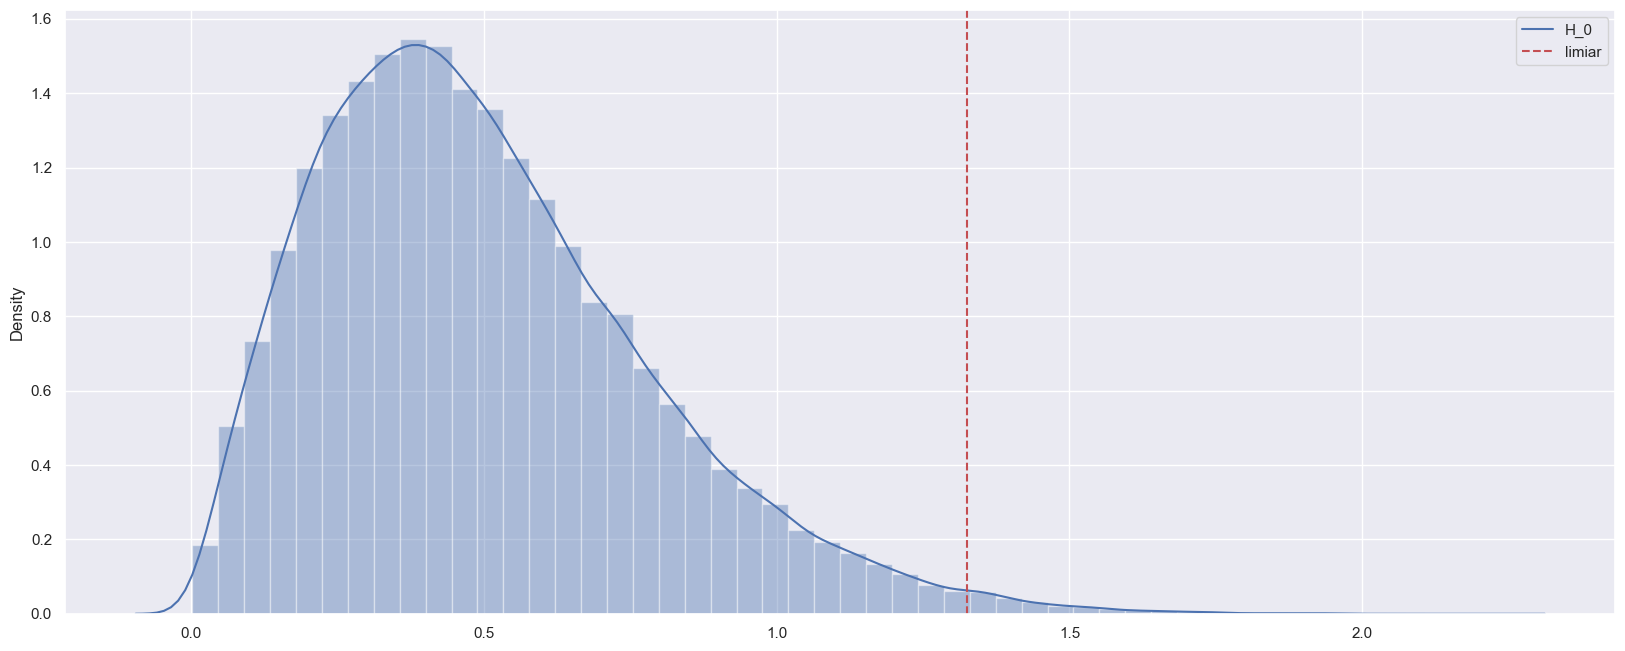

In [34]:
sns.distplot(ord)
plt.grid(True)
plt.axvline(limiar, 0,1,c='r',linestyle='--');
plt.legend(['H_0','limiar'])